In [11]:
import sys
sys.path.append('../')
import pystan
import stan_utility

import arviz as az
import pandas as pd
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors

Defining stan model for gamma distribution

In [ ]:
with open('gamma.stan') as file:
    print(file.read())

In [ ]:
model = stan_utility.compile_model('gamma.stan')

Providing data for stan model

In [ ]:
data=dict(alpha=0.1,beta=0.1)
alphas = [100, 5, 10, 1, 1, 0.1, 0.01, 0.001]
betas = [0.01, 0.1, 0.01, 1, 0.001,2, 1, 5]
dictionary = {}
for a,b in zip(alphas, betas):
    data = dict(alpha=a,beta=b)
    fit = model.sampling(data=data, seed=200, algorithm="Fixed_param")
    params=fit.extract()
    y_sim = params['y_sim']
    dictionary.update({'alpha=' + str(a) + ', beta=' + str(b):y_sim})

In [2]:
def print_grid(dictionary, bins = 10, cumulative = False):
    df = pd.DataFrame(dictionary)
    df = df.melt()
    g = sns.FacetGrid(df, col="variable", col_wrap=3, sharex=False)
    g.map(plt.hist, "value", bins = bins, cumulative = cumulative)

In [ ]:
print_grid(dictionary)

Repeating the procedure for inverse gamma distribution

In [ ]:
with open('inv_gamma.stan') as file:
    print(file.read())

In [ ]:
model = stan_utility.compile_model('inv_gamma.stan')

Providing data for stan model

In [ ]:
data=dict(alpha=0.1,beta=0.1)
alphas = [200, 100, 5, 10, 1, 1, 0.1]
betas = [0.001, 0.01, 0.1, 0.01, 1, 0.001,2]
dictionary = {}
for a,b in zip(alphas, betas):
    data = dict(alpha=a,beta=b)
    fit = model.sampling(data=data, seed=200, algorithm="Fixed_param")
    params=fit.extract()
    y_sim = params['y_sim']
    dictionary.update({'alpha=' + str(a) + ', beta=' + str(b):y_sim})

In [ ]:
print_grid(dictionary)

Using algebra solver

In [47]:
with open('algebra.stan') as file:
    print(file.read())

functions {
    vector gammaUnknown (vector y, vector theta, real[] x_r, int[] x_i) {
        vector[3] gammas;
        gammas[1] = gamma_cdf(theta[1], exp(y[1]), exp(y[2])) - exp(y[3]);
        gammas[2] = gamma_cdf(theta[2], exp(y[1]), exp(y[2])) - exp(y[3]) - 0.98;
        gammas[3] = exp(y[1])/exp(y[2]) - 7;
        return gammas;
    }
}
data {
    real lowerBound;
    real upperBound;
    real alphaGuess;
    real betaGuess;
    real probGuess;
}
transformed data {
    vector[3] y;
    real x_r[0];
    int x_i[0];
    vector[2] theta = [lowerBound, upperBound]';
    vector[3] y_guess = [log(alphaGuess), log(betaGuess), log(probGuess)]';
    y = algebra_solver(gammaUnknown, y_guess, theta, x_r, x_i);
}
generated quantities {
    real alpha = exp(y[1]);
    real beta = exp(y[2]);
}


In [48]:
model = stan_utility.compile_model('algebra.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bb18611b45130b0439661499a5b7e052 NOW.


In [49]:
data = {'lowerBound': 5, 'upperBound': 10, 'alphaGuess': 8, 'betaGuess': 1, 'probGuess': 0.09}
fit = model.sampling(data = data, algorithm = 'Fixed_param', iter = 1)
print("alpha: {}, beta: {}".format(fit.extract()['alpha'][0], fit.extract()['beta'][0]))


alpha: 47.3650757384028, beta: 6.76643939120023


In [50]:
with open('algebra_inv.stan') as file:
    print(file.read())

functions {
    vector gammaUnknown (vector y, vector theta, real[] x_r, int[] x_i) {
        vector[3] gammas;
        gammas[1] = inv_gamma_cdf(theta[1], exp(y[1]), exp(y[2])) - exp(y[3]);
        gammas[2] = inv_gamma_cdf(theta[2], exp(y[1]), exp(y[2])) - exp(y[3]) - 0.98;
        gammas[3] = exp(y[1])/exp(y[2]) - 7;
        return gammas;
    }
}
data {
    real lowerBound;
    real upperBound;
    real alphaGuess;
    real betaGuess;
    real probGuess;
}
transformed data {
    vector[3] y;
    real x_r[0];
    int x_i[0];
    vector[2] theta = [lowerBound, upperBound]';
    vector[3] y_guess = [log(alphaGuess), log(betaGuess), log(probGuess)]';
    y = algebra_solver(gammaUnknown, y_guess, theta, x_r, x_i);
}
generated quantities {
    real alpha = exp(y[1]);
    real beta = exp(y[2]);
}


In [51]:
model = stan_utility.compile_model('algebra_inv.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cb5de1c8a090dcaba657be89cf1e9aed NOW.


In [55]:
data = {'lowerBound': 5, 'upperBound': 10, 'alphaGuess': 18, 'betaGuess': 31, 'probGuess': 0.05}
fit = model.sampling(data=data, seed=200, algorithm="Fixed_param", iter=1)
params= fit.extract()
print('alpha= ', params['alpha'][-1])
print('beta= ', params['beta'][-1])

ValueError: Exception: Exception: inv_gamma_cdf: Shape parameter is nan, but must be > 0!  (in 'unknown file name' at line 4)
  (in 'unknown file name' at line 23)


Ad 2. Negative binomial distribution

In [ ]:
with open('binomial.stan') as file:
    print(file.read())

In [ ]:
model = stan_utility.compile_model('binomial.stan')

In [ ]:
data=dict(alpha=0.1,beta=0.1)
alphas = [200, 100, 5, 10, 1, 1, 0.1]
betas = [0.001, 0.01, 0.1, 0.01, 1, 0.001,2]
dictionary = {}
for a,b in zip(alphas, betas):
    data = dict(alpha=a,beta=b)
    fit = model.sampling(data=data, seed=200, algorithm="Fixed_param")
    params=fit.extract()
    y_sim = params['y_sim']
    dictionary.update({'alpha=' + str(a) + ', beta=' + str(b):y_sim})

In [ ]:
print_grid(dictionary)

Ad 3. Student- T distribution

In [3]:
with open('student_t.stan') as file:
    print(file.read())

data{
	real nu;
	real mu;
	real sigma;
}
generated quantities{
	real y_sim = student_t_rng(nu, mu, sigma);
}


In [4]:
model = stan_utility.compile_model('student_t.stan')

Using cached StanModel


In [23]:
dictionary= dict()
nus = [1, 2, 2.5, 3, 0.5, 1]
mus = [1, 2, 5, 3, 1, 0.8, 5]
sigmas = [1, 3, 0.5, 1, 0.7, 2]
for nu, mu, sigma in zip(nus, mus, sigmas):
    data = dict(nu=nu, mu= mu, sigma=sigma)
    fit = model.sampling(data=data, seed=200, algorithm="Fixed_param")
    params=fit.extract()
    y_sim = params['y_sim']
    dictionary.update({'nu=' + str(nu) + ', mu=' + str(mu) + ' sigma= ' + str(sigma):y_sim})

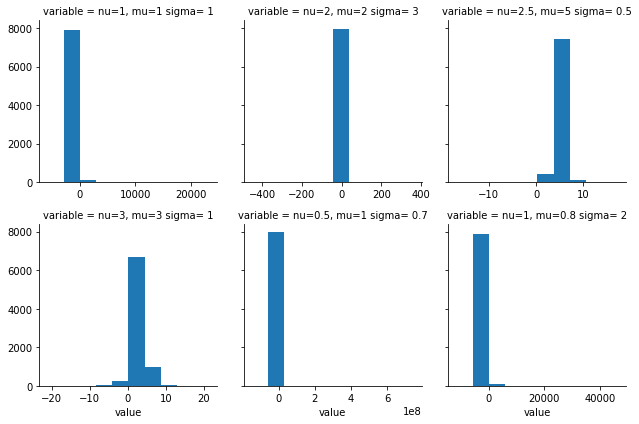

In [24]:
print_grid(dictionary)

(-10, 10)

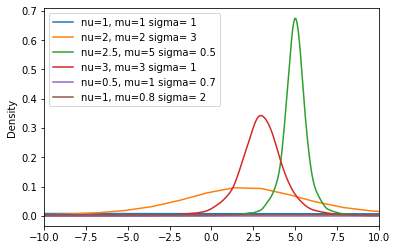

In [22]:
df = pd.DataFrame.from_dict(dictionary)
df.head()
ax= df.plot.kde()
ax.set_xlim([-10, 10])

Ad 4. Multivariate normal distributions

In [2]:
with open('multivariative_normal.stan') as file:
    print(file.read())

data{
	int N;
	vector[N] mu;
	matrix[N, N] sigma;
}

generated quantities{
	vector[N] y;
	y = multi_normal_rng(mu, sigma);
}


In [3]:
model = stan_utility.compile_model('multivariative_normal.stan')

Using cached StanModel


In [7]:
dictionary = dict()
dimension = 2
mus = [np.array([1, 2]), np.array([-1, 1])]
sigmas = [np.array([[0.5, 0.3], [0.3, 1]]), np.array([[2, 0.3],[0.3, 0.1]])]
for mu, sigma in zip(mus, sigmas):
    data = dict(N = dimension, mu = mu, sigma = sigma)
    fit = model.sampling(data=data, seed=200, algorithm="Fixed_param")
    params=pd.DataFrame(fit.extract()['y'])
    params.columns = ['y1', 'y2']
    dictionary.update({'mu= ' + str(mu) + ' sigma= ' + str(sigma):params})

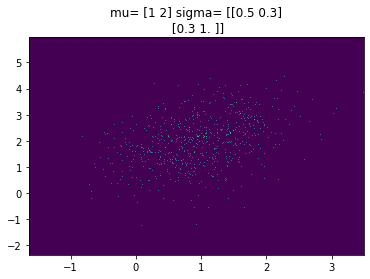

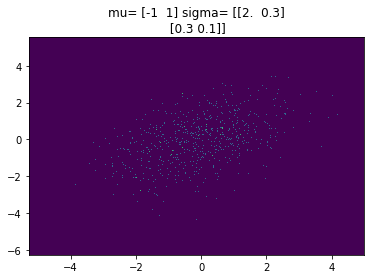

In [18]:
for key, value in dictionary.items():
    plt.figure()
    plt.hist2d(value['y1'], value['y2'], bins = 1000)
    plt.title(key)
plt.show()

mu= [0, 0] sigma= [[2.  0.3]
 [0.3 0.1]]
mu= [1, 1] sigma= [[2.  0.3]
 [0.3 0.1]]
mu= [-1, 1] sigma= [[2.  0.3]
 [0.3 0.1]]
mu= [1, -1] sigma= [[2.  0.3]
 [0.3 0.1]]


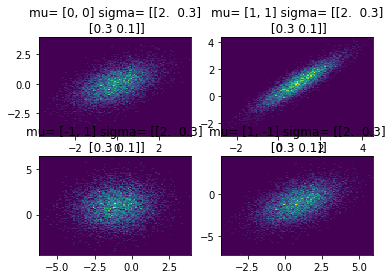

In [32]:
dictionary = dict()
mus = [[0,0], [1,1], [-1,1], [1,-1]]
matrixes = [[[1, 0.5], [0.5, 1]],
        [[1, 0.9], [0.9, 1]],
        [[2, 0.2], [0.2, 2]],
        [[2, 1], [1, 2]]]
params = []
for mu, matrix in zip(mus,matrixes):
    data=dict(N = 2, mu=np.array(mu), sigma=np.array(matrix))
    fit = model.sampling(data=data, seed=200, algorithm="Fixed_param")
    param=pd.DataFrame(fit.extract()['y'])
    param.columns = ['y1', 'y2']
    params.append(param)
    dictionary.update({'mu= ' + str(mu) + ' sigma= ' + str(sigma):param})
    
i = 1
for key, value in dictionary.items():
    print(key)
    plt.subplot(2,2,i)
    plt.hist2d(value['y1'], value['y2'], bins = 100)
    plt.title(key)
    i += 1
plt.show()

Extracting correlation matrices

In [33]:
corrs = []
for param in params:
    corrs.append(np.corrcoef(param['y1'], param['y2']))
print("1:\n{}\n\n2:\n{}\n\n3:\n{}\n\n4:\n{}".
      format(corrs[0], corrs[1], corrs[2], corrs[3]))

1:
[[1.         0.50042695]
 [0.50042695 1.        ]]

2:
[[1.         0.90036391]
 [0.90036391 1.        ]]

3:
[[1.         0.09946418]
 [0.09946418 1.        ]]

4:
[[1.         0.50042695]
 [0.50042695 1.        ]]


Using defined model for 3D distribution

In [35]:
data = {'N' : 3, 'mu': np.array([0, 0, 0]), 'sigma': np.array([[1, 0.25, 0.75], [0.25, 1, 0.5], [0.75, 0.5, 1]])}
fit = model.sampling(data = data, algorithm = 'Fixed_param', iter = 1000)
params = pd.DataFrame(fit.extract()['y'])
params.columns = ['y1', 'y2', 'y3']

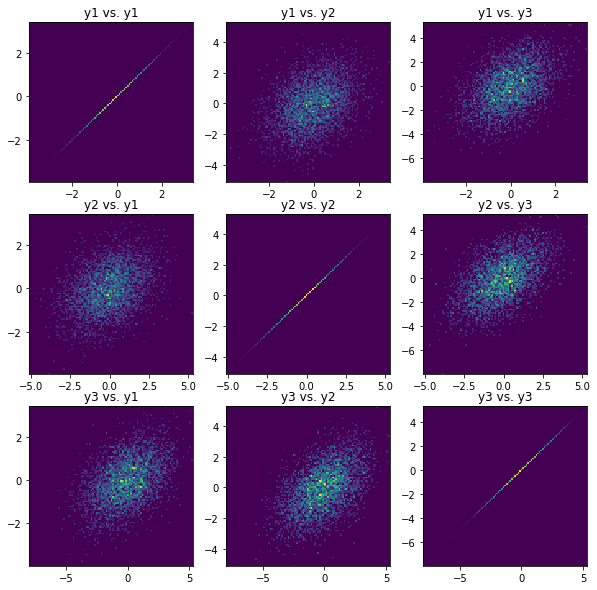

In [57]:
fig = plt.figure(figsize = [10,10])
for i in range(3):
    plt.subplot(3, 3, i + 1).set_title("y1 vs. y{}".format(i + 1))
    plt.hist2d(params.iloc[:, 0], params.iloc[:, i], bins = 100)
for i in range(3):
    plt.subplot(3, 3, i + 4).set_title("y2 vs. y{}".format(i + 1))
    plt.hist2d(params.iloc[:, 1], params.iloc[:, i], bins = 100)
for i in range(3):
    plt.subplot(3, 3, i + 7).set_title("y3 vs. y{}".format(i + 1))
    plt.hist2d(params.iloc[:, 2], params.iloc[:, i], bins = 100)

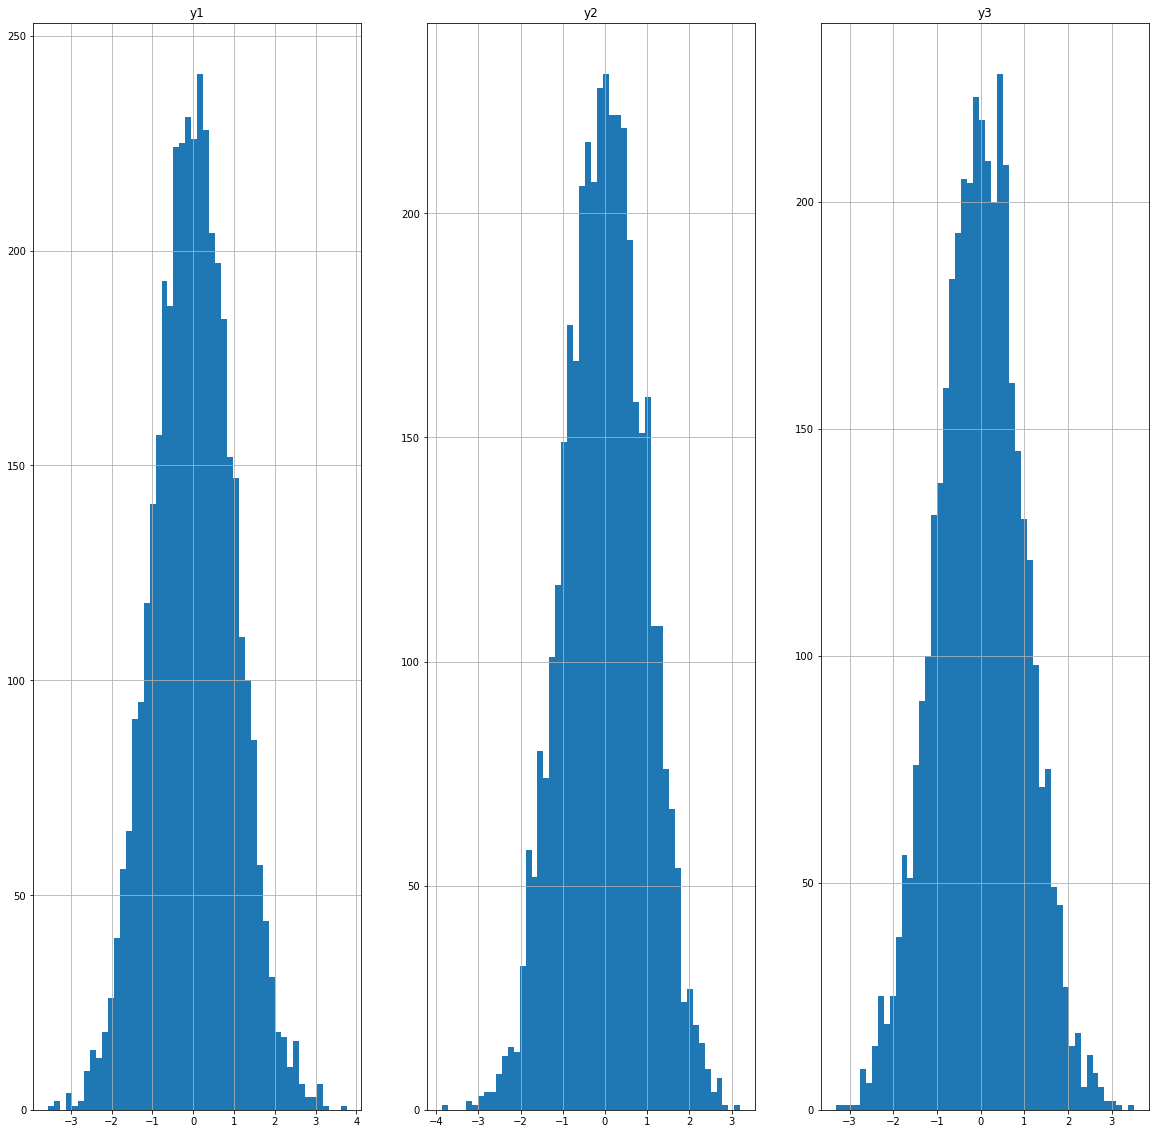

In [41]:
plt.figure(figsize = [20, 20])
for i in range(3):
    plt.subplot(1, 3, i + 1).set_title('y{}'.format(i + 1))
    plt.hist(params.iloc[:, i], bins = 50)
    plt.grid()
plt.show()

In [42]:
data = {'N':4, 'mu': np.array([0, 0, 0, 0]), 'sigma': np.array([[1, 0.5, 0.75, 0.1], [0.5, 2, 1.25, 1.75],
                                                             [0.75, 1.25, 3, 2.5], [0.1, 1.75, 2.5, 4]])}
fit = model.sampling(data = data, algorithm = 'Fixed_param', iter = 1000)
params = pd.DataFrame(fit.extract()['y'])
params.columns = ['y1', 'y2', 'y3', 'y4']

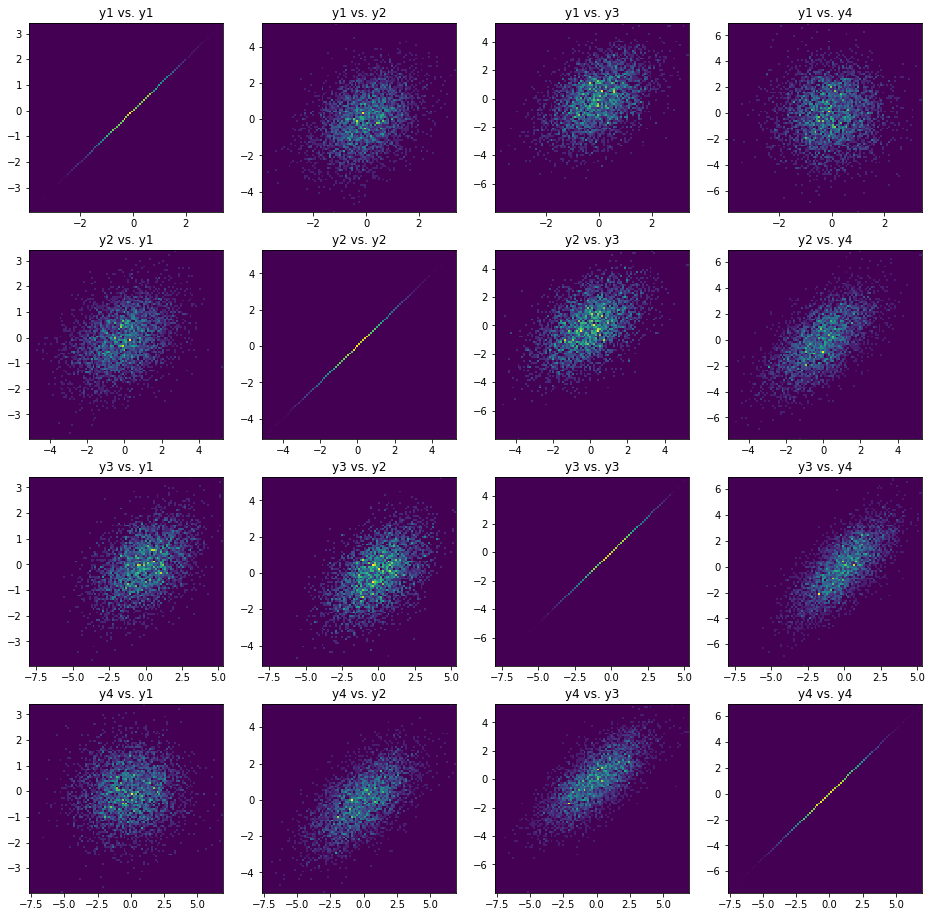

In [58]:
fig = plt.figure(figsize = [16, 16])
for i in range(4):
    plt.subplot(4, 4, i + 1).set_title("y1 vs. y{}".format(i + 1))
    plt.hist2d(params.iloc[:, 0], params.iloc[:, i], bins = 100)
for i in range(4):
    plt.subplot(4, 4, i + 5).set_title("y2 vs. y{}".format(i + 1))
    plt.hist2d(params.iloc[:, 1], params.iloc[:, i], bins = 100)
for i in range(4):
    plt.subplot(4, 4, i + 9).set_title("y3 vs. y{}".format(i + 1))
    plt.hist2d(params.iloc[:, 2], params.iloc[:, i], bins = 100)
for i in range(4):
    plt.subplot(4, 4, i + 13).set_title("y4 vs. y{}".format(i + 1))
    plt.hist2d(params.iloc[:, 3], params.iloc[:, i], bins = 100)
plt.show()

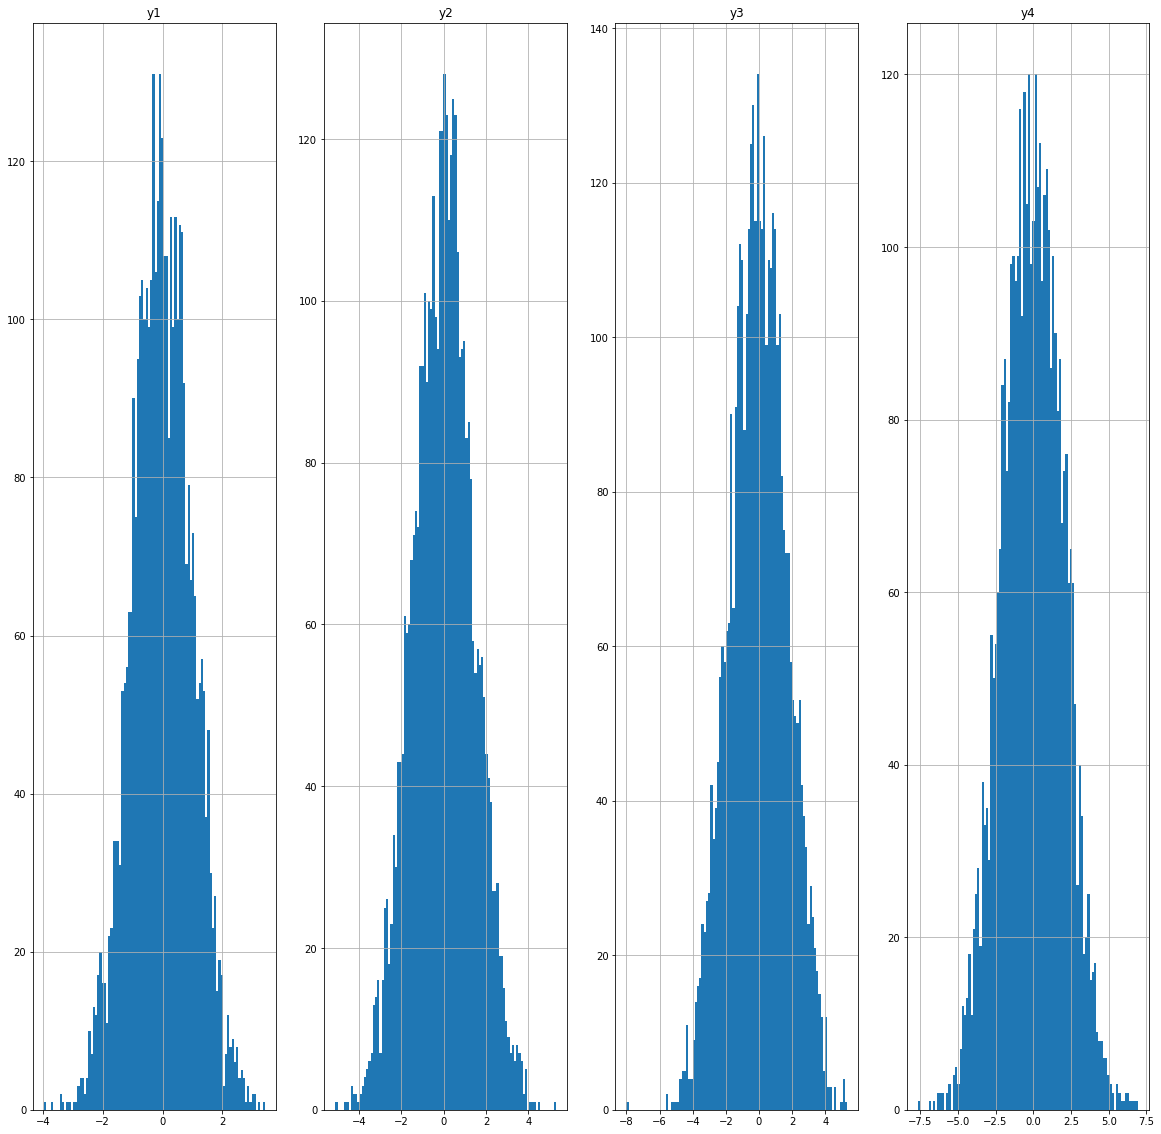

In [59]:
plt.figure(figsize = [20, 20])
for i in range(4):
    plt.subplot(1, 4, i + 1).set_title('y{}'.format(i + 1))
    plt.hist(params.iloc[:, i], bins = 100)
    plt.grid()
plt.show()